In [1]:
%reload_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader
from main import FeatureGroup, CustomDataset
from torch import tensor
from scripts.dasps_preprocess import DaspsPreprocessor
from matplotlib import pyplot as plt
from torcheval.metrics import MulticlassAccuracy

In [3]:
dataset = CustomDataset(DaspsPreprocessor.get_trials(duration=8))

Getting epochs for filename data/dasps_raw_mat/S01.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Creating RawArray with float64 data, n_channels=14, n_times=3840
    Range : 0 ... 3839 =      0.000 ...    29.992 secs
Ready.
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S01.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Creating RawArray with float64 data, n_channels=14, n_times=3840
    Range : 0 ... 3839 =      0.000 ...    29.992 secs
Ready.
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Getting epochs for filename data/dasps_raw_mat/S02.mat
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Creating RawArray with float64 data, n_channels=14, n_ti

In [6]:
trial = dataset.trials[0]

(369, 369)


array([107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107,
       107, 107, 106, 106, 106, 106, 106, 106, 106, 105, 105, 105, 105,
       105, 105, 104, 104, 104, 104, 102, 102, 102, 102, 101, 101, 101,
       101, 100, 100, 100,  99,  99,  99,  98,  98,  97,  97,  97,  96,
        96,  95,  95,  94,  94,  93,  93,  92,  92,  91,  90,  90,  89,
        88,  88,  87,  86,  85,  85,  84,  83,  82,  80,  79,  76,  75,
        72,  71,  68,  66,  64,  61,  58,  55,  52,  51,  48,  45,  42,
        40,  37,  34,  32,  30,  29,  26,  24,  22,  20,  18,  17,  15,
        12,  11,  10,   8,   6,   5,   3,   2,   1,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   3,
         4,   6,   8,   9,  11,  12,  15,  16,  18,  19,  22,  23,  25,
        27,  29,  31,  32,  34,  37,  38,  41,  44,  47,  48,  5

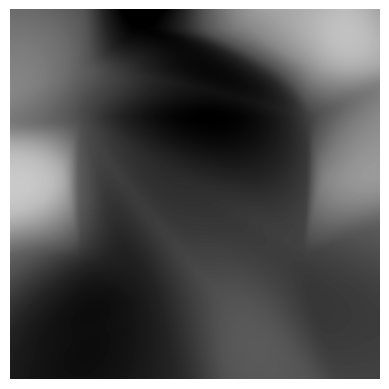

In [103]:
import mne.viz
import mne_features
from common import freq_bands, sfreq, n_channels, n_bands
import matplotlib.pyplot as plt
import io
from PIL import Image

freq_bands_ = np.asanyarray([freq_bands[band][0]
                                for band in freq_bands] + [freq_bands['gamma'][1]])

powers = mne_features.univariate.compute_pow_freq_bands(
    sfreq, trial.epoch.get_data()[0],
    freq_bands_, normalize=True, psd_method='welch',
    psd_params={'welch_n_overlap': sfreq // 2})
powers = powers[:n_channels *
                            n_bands].reshape((n_channels, -1))

powers.shape

alpha = powers.swapaxes(0, 1)[0]

fig, ax = plt.subplots(frameon=False)
im, _ = mne.viz.plot_topomap(alpha, trial.epoch.info, contours=0, sensors=False, outlines=None, res=128, cmap="Greys", axes=ax, show=False)

buf = io.BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
buf.seek(0)

image = Image.open(buf)
print(image.size)
gray_image = image.convert('L')
pixel_array = np.asarray(gray_image)

